# Preprocessing: Water treatment plants

**Objective**: Prepare data from the **MERKUR** dataset for use in machine learning algorithms.

**Background**: The MERKUR project, based in the *Research Centre for Built Environment, Climate, Water Technology and Digitalisation* at VIA University College, collects and analyzes data from water treatment plants in Denmark. In short, the project aims to understand how water treatment plants are run, and the results are then ideally used to optimize the running of water treatment plants. However, the dataset is, as of now, relatively "dirty" in a machine learning context: There are many missing values, outliers, a mix of categorical and numeric data, etc.

**Data Source**: The dataset has kindly been provided to us by Senior Associate Professor Loren Mark Ramsay. You can read more [here](https://en.via.dk/research/built-environment-climate-water-technology-and-digitalisation/water-treatment-and-distribution) and [here](https://www.ucviden.dk/en/projects/merkur-national-web-baseret-dataplatform-til-drikkevandsbehandlin).

Note that we are only working with a subset of the full database. This subset is saved as an Excel file, `merkur.xlsx`.

#### Overall Instructions
1. Explore the dataset to understand the features and their distributions.
2. Preprocess the data, handling any missing values, outliers, etc.

Below some suggestions are given but the assignment is relatively "free".

Best of luck with your analysis!

In [204]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel(r"merkur.xlsx")
df

,WaterworksName,TotalFilters,MaxTypicalFlow,AverageFilterArea,AverageTypicalRunVolume,AverageBackwashVolume,PrimaryTrigger,AverageTotalFilterDepth,OverallFilterGrainSizeMin,OverallFilterGrainSizeMax,...,SumOfld_layer,UniformityCoefficient,UFRV,BW%,HLR_BW,TankCapacity,TankExploitation,GravityPressureMixed,Stages,AbstractedVolume
0,Asnæs Vandværk,6,50.00%,6.00%,5200.00%,10.00%,Time,NaN,NaN,NaN,...,NaN,NaN,866.67%,0.41%,NaN,27.29%,NaN,Gravity,Single,253543
1,Assens Vandværk,4,110.00%,4.91%,300.00%,28.00%,Volume,310.00%,0.80%,5.00%,...,2891.67%,NaN,40.74%,23.00%,30.56%,2.58%,NaN,Pressure,Double,612094
2,Astrup Vandværk - Esbjerg,4,120.00%,15.34%,3800.00%,83.30%,Volume,190.00%,2.00%,35.00%,...,759.00%,1.49%,249.22%,2.19%,32.79%,21.83%,NaN,Gravity,Double,682318
3,Astrup Vandværk - Skjern,2,NaN,16.00%,1200.00%,26.00%,Volume,NaN,NaN,NaN,...,NaN,NaN,75.00%,2.17%,NaN,12.55%,NaN,Gravity,Single,156998
4,Avernakø Vandværk,2,NaN,1.49%,250.00%,4.50%,Volume,NaN,1.60%,32.00%,...,NaN,NaN,167.22%,1.82%,NaN,52.22%,NaN,Gravity,Single,6710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Værket ved Regnemark,16,1426.00%,47.94%,NaN,110.00%,Mix,142.00%,0.80%,150.00%,...,90.81%,NaN,NaN,0.18%,NaN,9.18%,39.68%,Gravity,Double,11454775
75,Værket ved Søndersø,20,1407.29%,10.18%,4500.00%,57.00%,Volume,190.00%,0.80%,8.00%,...,1708.10%,1.62%,442.10%,1.24%,51.09%,6.04%,NaN,Pressure,Single,11021800
76,Østerbyværket,6,250.00%,14.75%,2331.50%,51.57%,Time,170.00%,1.40%,4.00%,...,842.86%,1.85%,158.04%,4.45%,30.37%,22.37%,45.83%,Gravity,Single,423362
77,Østre Vandværk - Herning,12,NaN,37.44%,4400.00%,134.00%,Volume,NaN,NaN,NaN,...,NaN,NaN,93.49%,35.39%,32.05%,NaN,NaN,Gravity,Double,1521895


### Suggestions

-  Filter out (i.e. remove) any irrelevant columns (e.g. names, IDs, etc.)
-  Several columns contain missing values (NaNs). Find out how large a percentage each column is missing. Perhaps some of them lack so much data that you should consider removing them?
-  Scale numeric data.
-  For the features you choose to keep, impute the missing values in an appropriate way - or perhaps you find it more appropriate to delete the rows?
-  Several features (e.g., "PrimaryTrigger") are categorical. Use one-hot encoding to turn them into numeric data. Be careful with the feature "Stages" - perhaps one-hot encoding is not the best choice here?
-  If you you choose to remove or replace outliers, do this now. If you choose to keep, move on.
-  Create a correlation matrix and discuss - based on this, you might want to drop certain columns.
-  Consider whether some features should be transformed (e.g. using log, square root etc.) and do this if found relevant.
-  There are only about 80 rows in the data set. Discuss consequences of this in terms of machine learning - as well as potential solutions. 
-  Think about whether there are other steps you find appropriate at this point. If not, declare your data set clean.

In [205]:
# We choose to pretend that we are going to be building a regression model where our y-hat is going to be the [AverageBackwashVolume].
# After brief analysis and discussion we have decided that this feature is good candidate for a model to predict how much water is required to wash the filter based on certain features.


# Start by removing the irrelevant columns, i.e. the columns that are not needed for the analysis. [WaterWorksName]
df.drop(['WaterworksName'], axis=1, inplace=True)


Percentage of Missing Values


TotalFilters                              0.00%
OxygenFactor                              0.00%
AerationType_Air injection                0.00%
Stages                                    0.00%
GravityPressureMixed_Gravity              0.00%
PrimaryTrigger_Waterlevel above filter    0.00%
PrimaryTrigger_Volume                     0.00%
PrimaryTrigger_Time                       0.00%
PrimaryTrigger_Mix                        0.00%
AerationType_Pure oxygen injection        0.00%
AerationType_Passive plate aerator        0.00%
AerationType_Other                        0.00%
AerationType_No primary aeration          0.00%
AerationType_Inka                         0.00%
AerationType_Cascade                      0.00%
AerationType_Bottom aeration              0.00%
GravityPressureMixed_Mixed                0.00%
GravityPressureMixed_Pressure             0.00%
AverageTypicalRunVolume                   2.53%
Footprint                                 5.06%
AverageFilterArea                       

Percentage of Missing Values After Dropping Columns


TotalFilters                              0.00%
OxygenFactor                              0.00%
AerationType_Air injection                0.00%
Stages                                    0.00%
GravityPressureMixed_Gravity              0.00%
PrimaryTrigger_Waterlevel above filter    0.00%
PrimaryTrigger_Volume                     0.00%
PrimaryTrigger_Time                       0.00%
PrimaryTrigger_Mix                        0.00%
AerationType_Pure oxygen injection        0.00%
AerationType_Passive plate aerator        0.00%
AerationType_Other                        0.00%
AerationType_No primary aeration          0.00%
AerationType_Inka                         0.00%
AerationType_Cascade                      0.00%
AerationType_Bottom aeration              0.00%
GravityPressureMixed_Mixed                0.00%
GravityPressureMixed_Pressure             0.00%
AverageTypicalRunVolume                   2.53%
Footprint                                 5.06%
AverageFilterArea                       

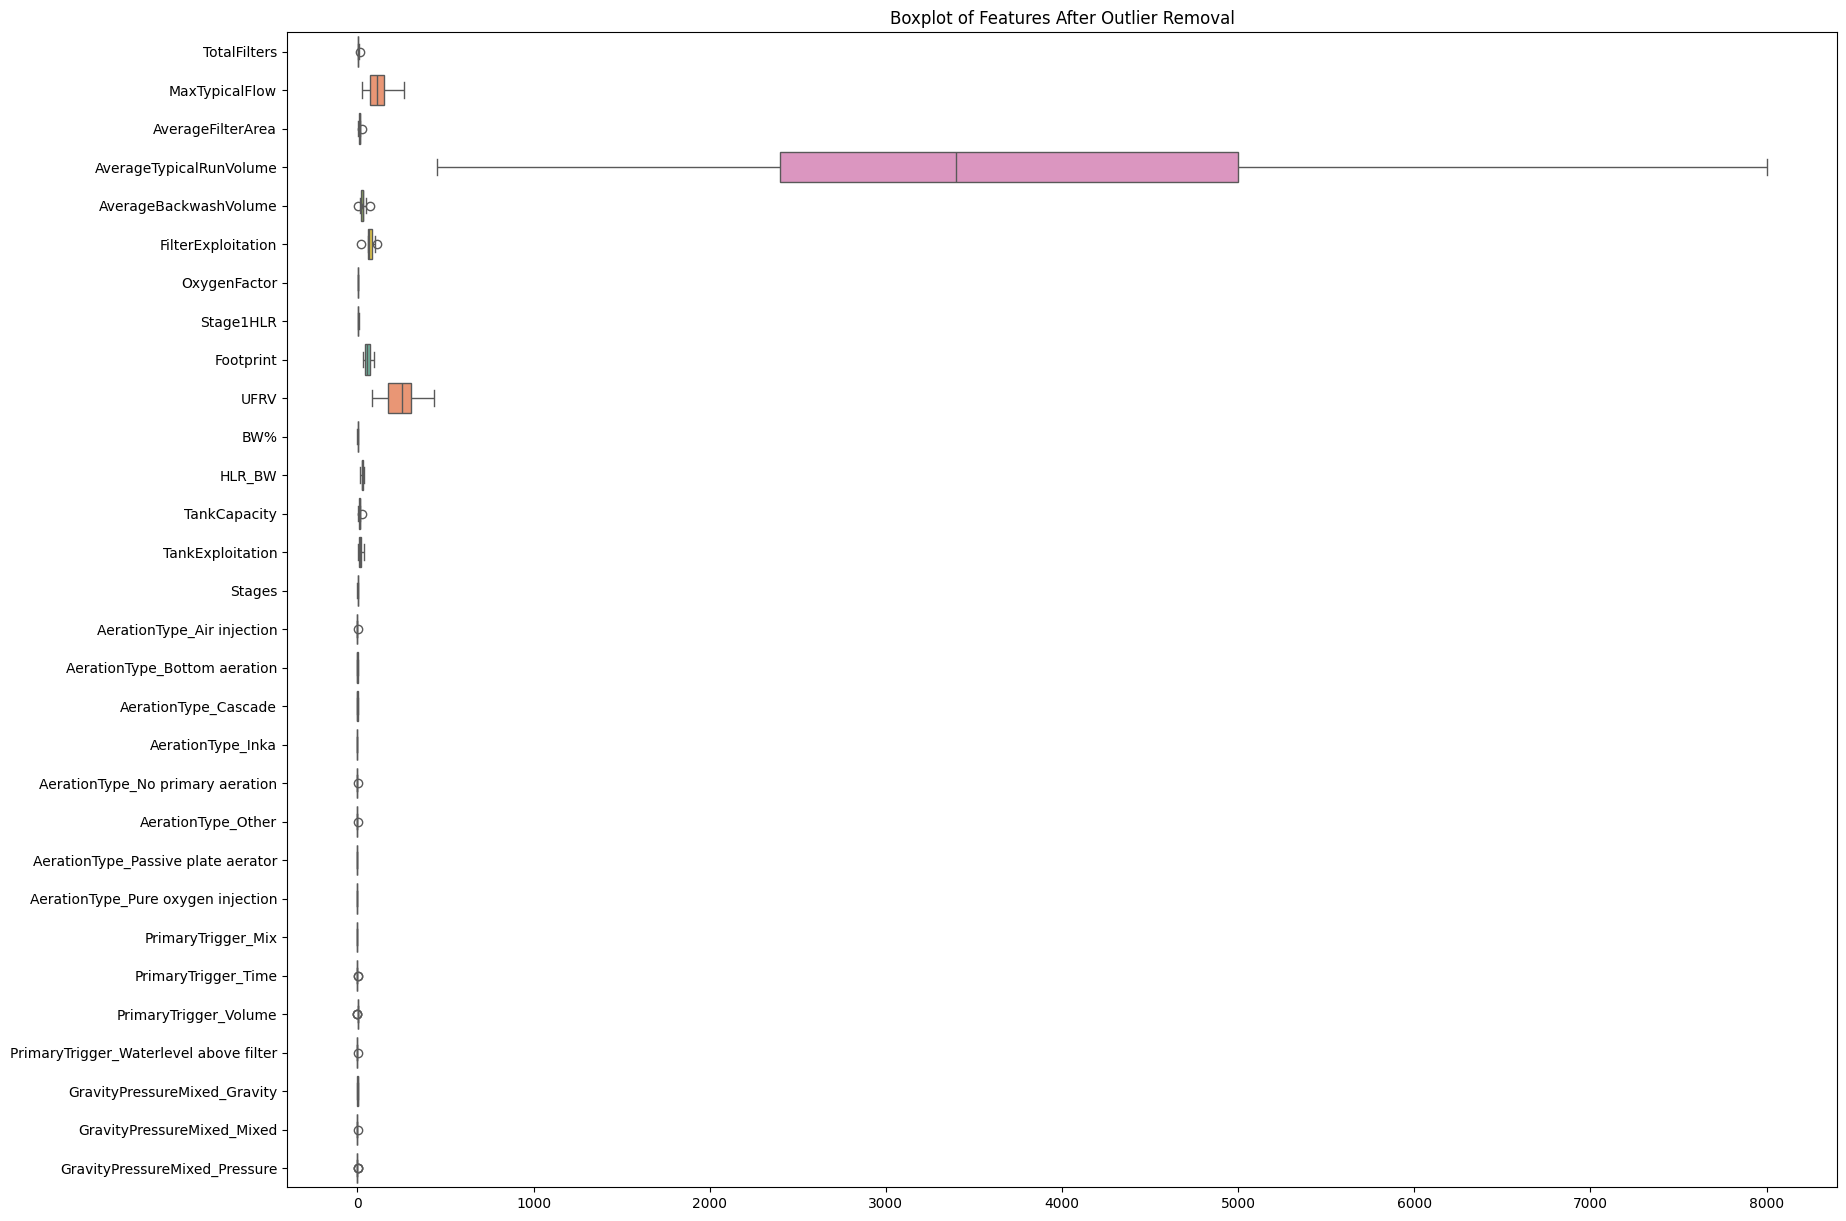

In [213]:
# Initial setup to handle missing values and drop columns with >40% missing values
print("Percentage of Missing Values")
pd.options.display.float_format = '{:.2f}%'.format
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage.sort_values(inplace=True)
display(missing_percentage)

# Dropping columns with more than 40% missing values
columns_to_drop = missing_percentage[missing_percentage > 40].index
df.drop(columns=columns_to_drop, inplace=True)

# Verify the removal of columns by printing the table with the percentages again
print("Percentage of Missing Values After Dropping Columns")
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage.sort_values(inplace=True)
display(missing_percentage)

# Removing outliers using the IQR method for each column
# We will apply this only to numerical columns
numerical_columns = df.select_dtypes(include=["float", "int"]).columns

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows where the column value is outside these bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Create a boxplot for each feature to visualize remaining data after outlier removal
plt.figure(figsize=(20, 15))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title('Boxplot of Features After Outlier Removal')
plt.show()


In [207]:
# These are not ordinal values, so we choose to one-hot encode them.
df = pd.get_dummies(df, columns=['AerationType', 'PrimaryTrigger', 'GravityPressureMixed'])

# Since the data in the 'Stages' column is ordinal, we choose to replace the values with integers instead of one-hot encoding
df['Stages'] = df['Stages'].replace({'Mixed': 0, 'Single': 1, 'Double': 2, "Triple": 3})

/tmp/ipykernel_26301/3790904296.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Stages'] = df['Stages'].replace({'Mixed': 0, 'Single': 1, 'Double': 2, "Triple": 3})


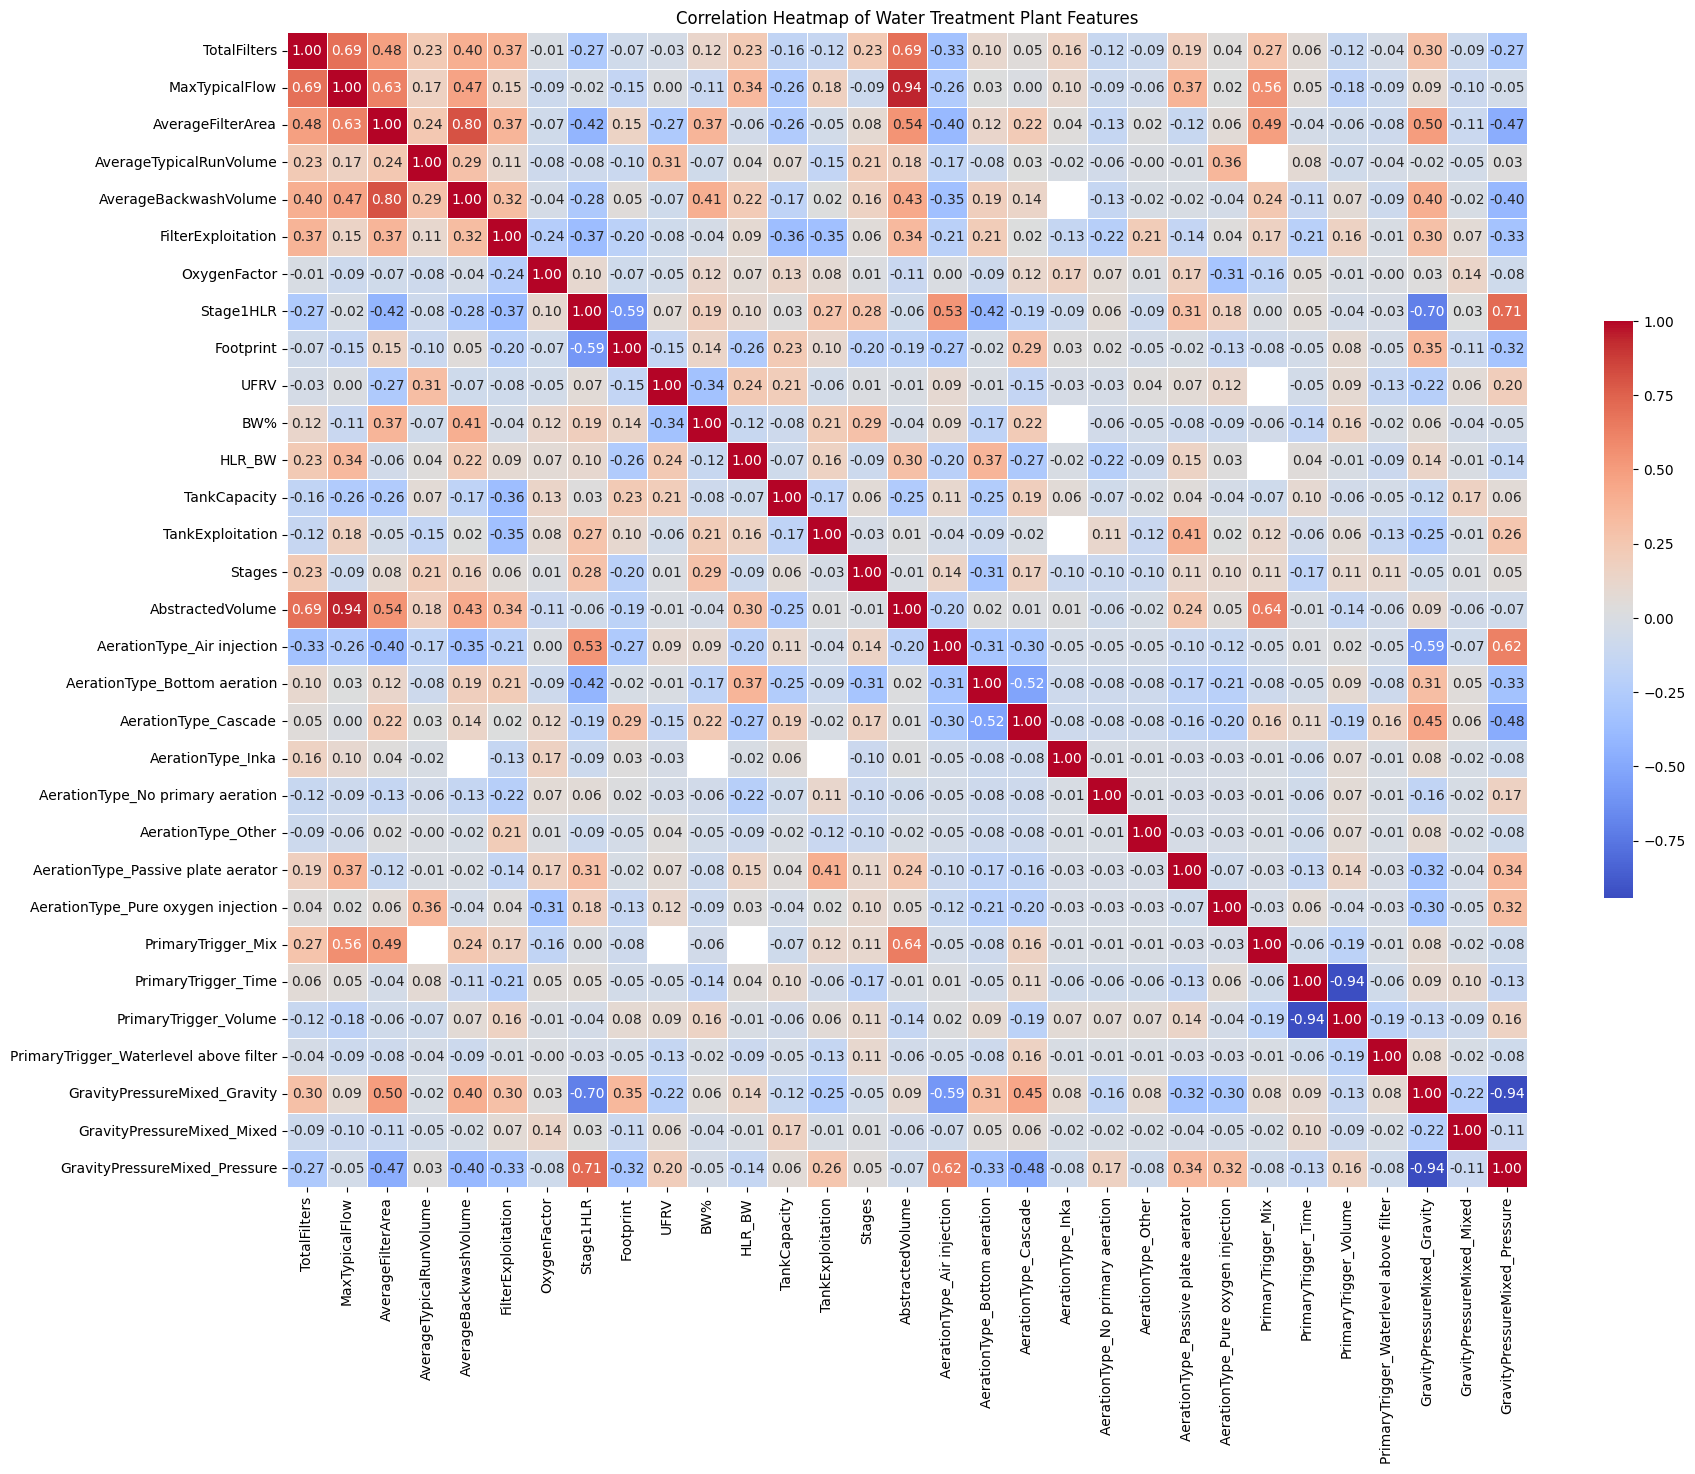

'Absolute correlation values to AbstractedVolume'

AbstractedVolume                         1.00%
MaxTypicalFlow                           0.94%
TotalFilters                             0.69%
PrimaryTrigger_Mix                       0.64%
AverageFilterArea                        0.54%
AverageBackwashVolume                    0.43%
FilterExploitation                       0.34%
HLR_BW                                   0.30%
TankCapacity                             0.25%
AerationType_Passive plate aerator       0.24%
AerationType_Air injection               0.20%
Footprint                                0.19%
AverageTypicalRunVolume                  0.18%
PrimaryTrigger_Volume                    0.14%
OxygenFactor                             0.11%
GravityPressureMixed_Gravity             0.09%
GravityPressureMixed_Pressure            0.07%
AerationType_No primary aeration         0.06%
Stage1HLR                                0.06%
GravityPressureMixed_Mixed               0.06%
PrimaryTrigger_Waterlevel above filter   0.06%
AerationType_

In [208]:
# Calculate the correlation matrix
corr = df.corr()

# Initialize a matplotlib figure for displaying
plt.figure(figsize=(20, 15))

# Use seaborn for a neat heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', 
            xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.5, cbar_kws={'shrink': .5})

# Add a title
plt.title('Correlation Heatmap of Water Treatment Plant Features')

plt.show()

# Display the absolute correlation values to AbstractedVolume (The higher the better)
display('Absolute correlation values to AbstractedVolume')
corr["AbstractedVolume"].abs().sort_values(ascending=False)

In [209]:
#After analyzing the correlation matrix, these are the methods we choose to use for imputing the missing values:
# 0 to 10% missing values: Impute with the mean
#AverageBackwashVolume     12.66% - Since this is our target variable, we will drop the rows with missing values
#BW%                       16.46% - Since this is a perentage, we wanted to use linear regression to predict the missing values, but since we found no correlation with any other feature, we will just use mean.
#FilterExploitation        20.25% - We will try to use KNN to impute the missing values, as its useful when missing values are not randomly distrubuted. if not we will use mean.
#MaxTypicalFlow            20.25% - We will try to use KNN to impute the missing values, as its useful when missing values are not randomly distrubuted. if not we will use mean.
#Stage1HLR                 26.58% - We found a high correlation with 2 other features, so we will use linear regression to predict the missing values.
#HLR_BW                    34.18% - We found no correlation with any other feature for linear regression, so we will use mean.
#TankExploitation          37.97% - We found no correlation with any other feature for linear regression, so we will use mean.